In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\projectdata\Training_Data.csv")

In [3]:
print(data.head())

   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0   

In [4]:
data.shape

(252000, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [7]:
## How many have defaulted on loan
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


The total number of defaulters are 30996 and the percent of defaulters is  12.3 %


<Axes: xlabel='Risk_Flag', ylabel='count'>

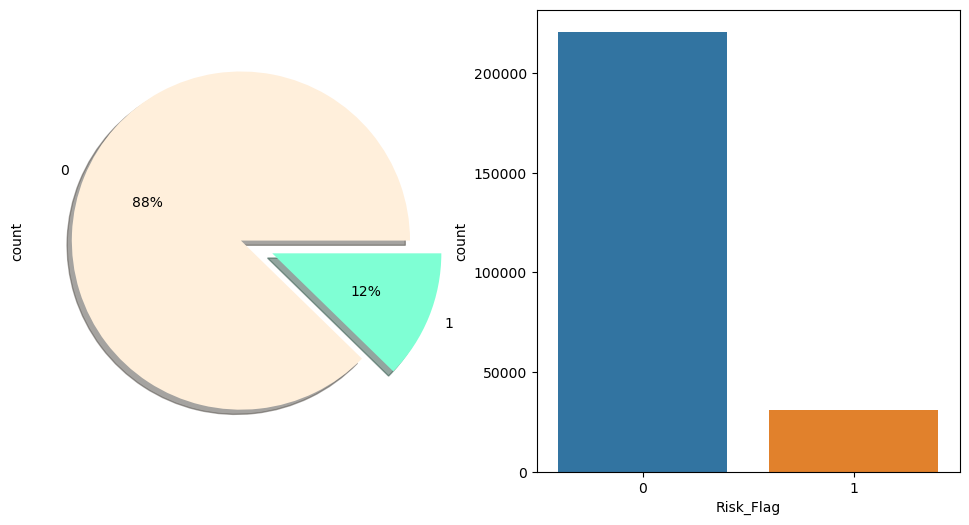

In [8]:
defaulters=data.Risk_Flag.sum()
total=len(data.Risk_Flag)
rate_of_default=defaulters/total
print('The total number of defaulters are',defaulters,'and the percent of defaulters is ',rate_of_default*100,'%')

f,ax=plt.subplots(1,2,figsize=(12,6))
a=data.Risk_Flag.value_counts()
a.plot.pie(autopct= "%1.f%%",shadow=True,explode=[0,0.2],ax=ax[0],colors=['#FFEFDB','#7FFFD4'])

sns.countplot(x="Risk_Flag",data=data,ax=ax[1])



In [9]:
b=data['Married/Single'].value_counts()
print(b)
crosstab1=pd.crosstab(data['Risk_Flag'],data['Married/Single'],margins=True)
crosstab1


Married/Single
single     226272
married     25728
Name: count, dtype: int64


Married/Single,married,single,All
Risk_Flag,,,
0,23092,197912,221004
1,2636,28360,30996
All,25728,226272,252000


In [10]:
married_defaulters=2636/25728
Single_defaulters=28360/226272
print(married_defaulters*100)
print(Single_defaulters*100)

10.245646766169154
12.533587894215811


<Axes: xlabel='Married/Single', ylabel='count'>

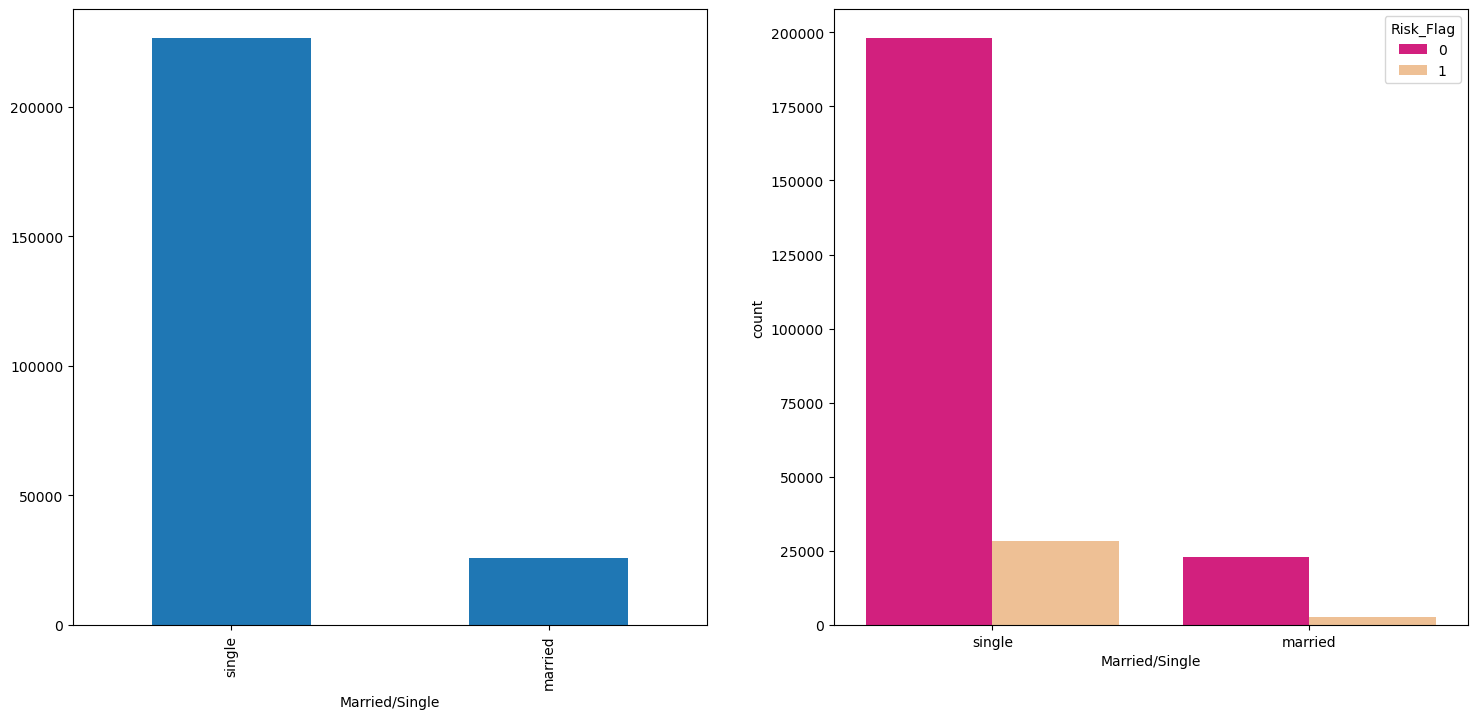

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Married/Single'].value_counts().plot.bar(ax=ax[0])
sns.countplot(x=data['Married/Single'],hue=data['Risk_Flag'],ax=ax[1],palette='Accent_r')

In [12]:
print('Number of unique professions in the dataset are',data['Profession'].nunique())

Number of unique professions in the dataset are 51


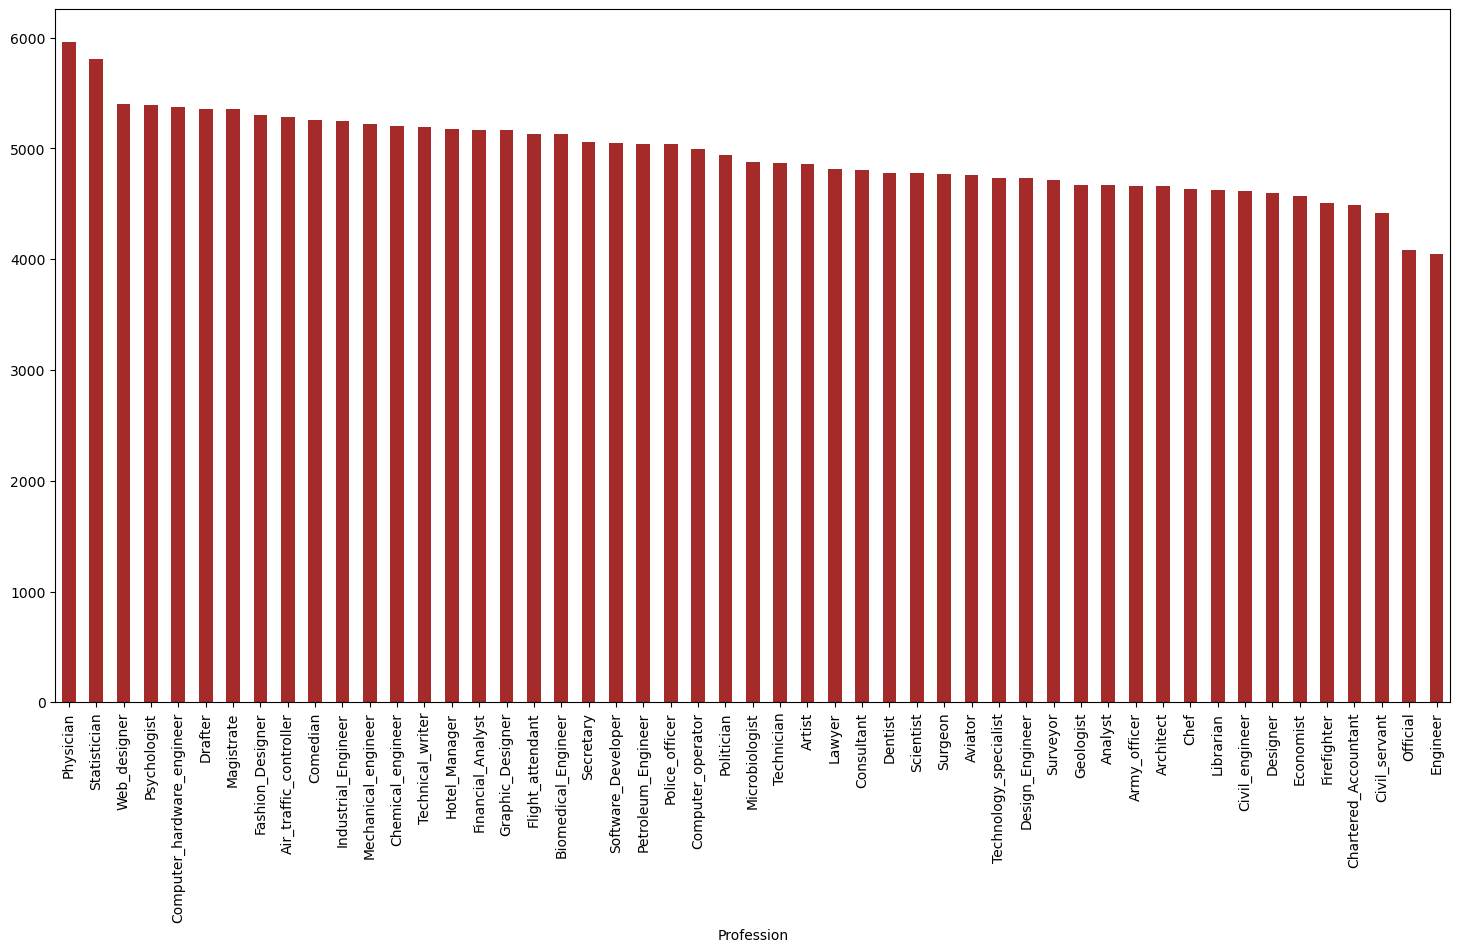

Risk_Flag,0,1,All
Profession,,,
All,221004,30996,252000
Police_officer,4209,826,5035
Software_Developer,4303,750,5053
Air_traffic_controller,4566,715,5281
Surveyor,4000,714,4714


In [13]:
plt.subplots(figsize=(18,9))
data.Profession.value_counts().plot.bar(color='brown')
plt.show()
crosstab2=pd.crosstab(data['Profession'],data['Risk_Flag'],margins=True)
crosstab2.sort_values(by=1,ascending=False).head()

In [14]:
## Here in the above crosstab we can see that the maximum loan is taken by physicians while police_officers are the ones who defaulted the most

In [15]:
data.House_Ownership.value_counts()

House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64

<Axes: xlabel='House_Ownership', ylabel='count'>

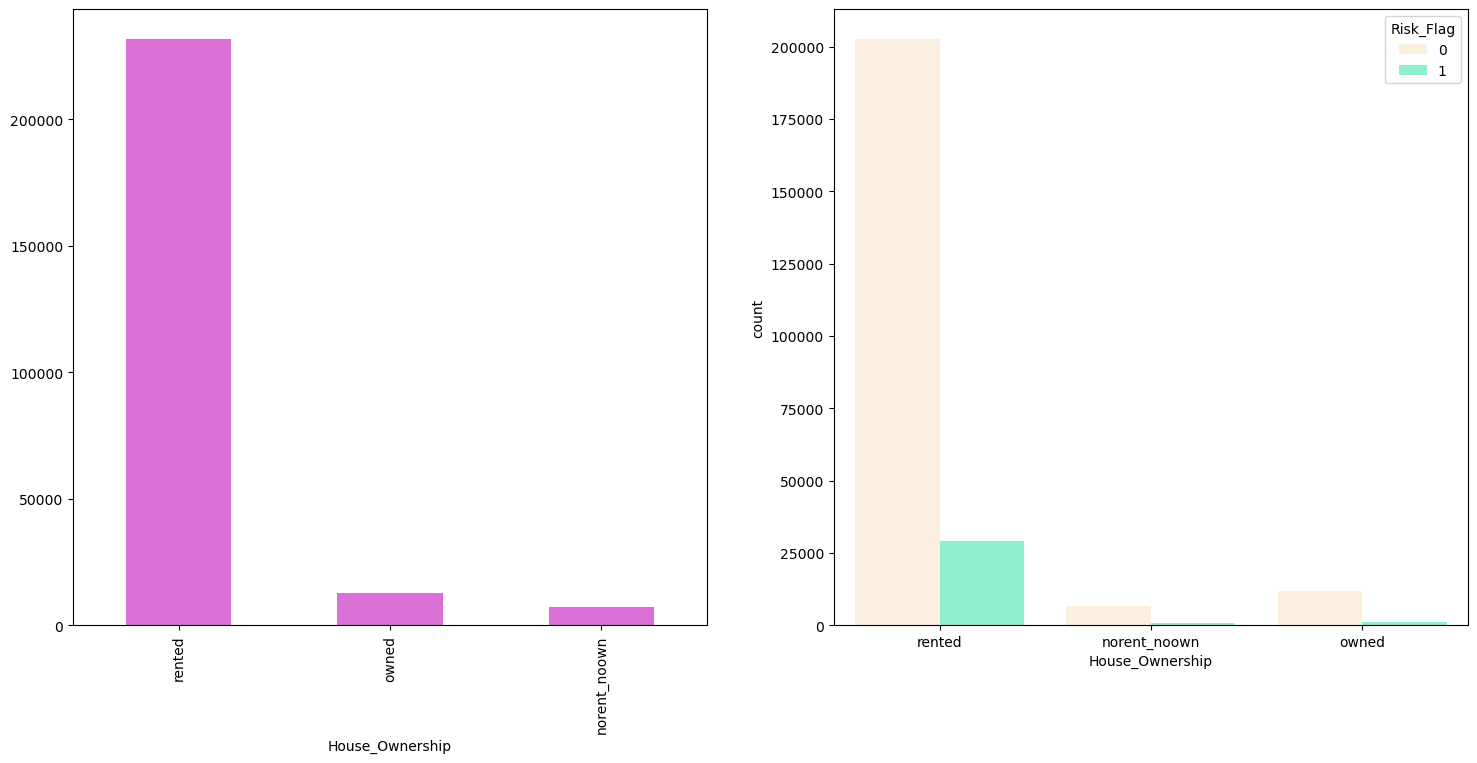

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data.House_Ownership.value_counts().plot.bar(color='orchid',ax=ax[0])
sns.countplot(x=data.House_Ownership,hue=data.Risk_Flag,palette=['#FFEFDB','#7FFFD4'])

In [17]:
data.Car_Ownership.value_counts()

Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64

<Axes: xlabel='Car_Ownership', ylabel='count'>

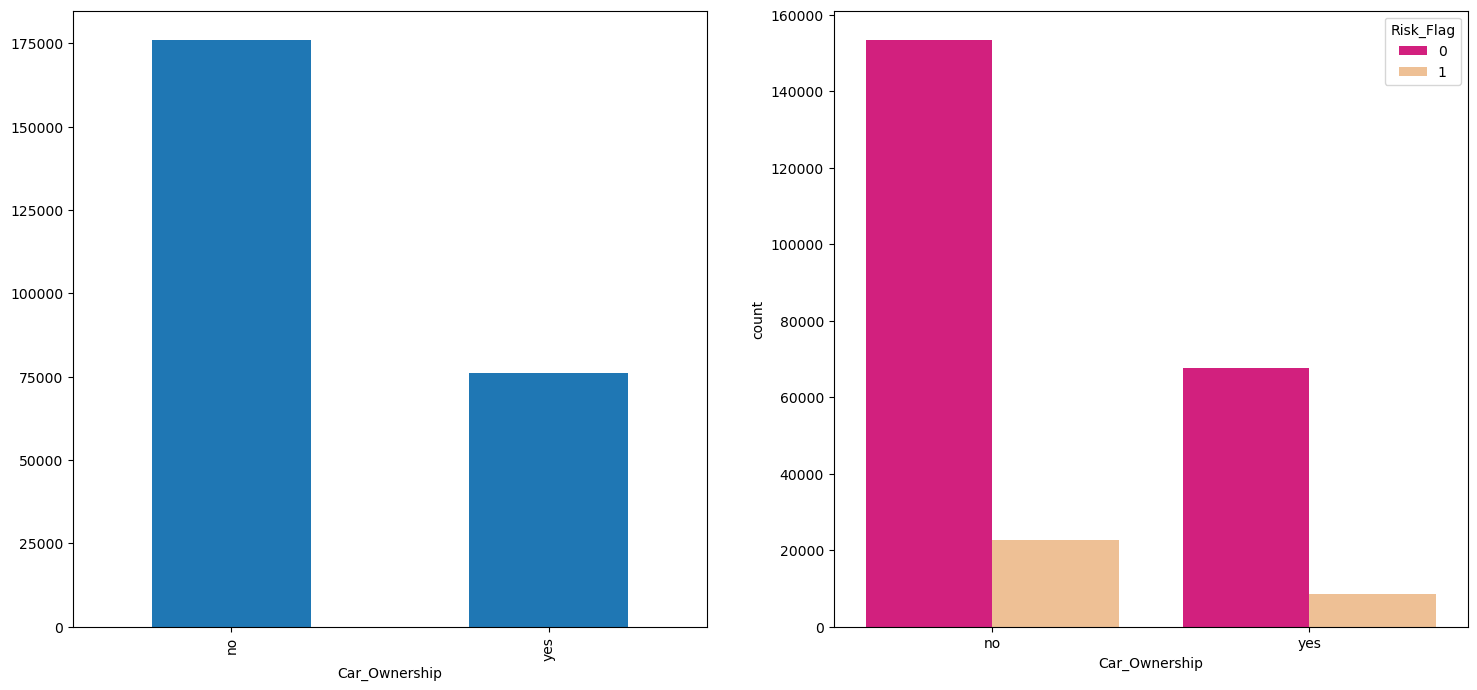

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data.Car_Ownership.value_counts().plot.bar(ax=ax[0])
sns.countplot(x=data.Car_Ownership,hue=data.Risk_Flag,palette='Accent_r')

In [19]:
crosstab3=pd.crosstab(data.Car_Ownership,data.Risk_Flag,margins=True)
crosstab3

Risk_Flag,0,1,All
Car_Ownership,,,
no,153439,22561,176000
yes,67565,8435,76000
All,221004,30996,252000


In [20]:
print('Number of defaulters who own a car ',8435/76000*100,'%')
print('Number of deafulters who do not own a car',22561/176000*100,'%')

Number of defaulters who own a car  11.098684210526317 %
Number of deafulters who do not own a car 12.818750000000001 %


C:\Users\hp\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


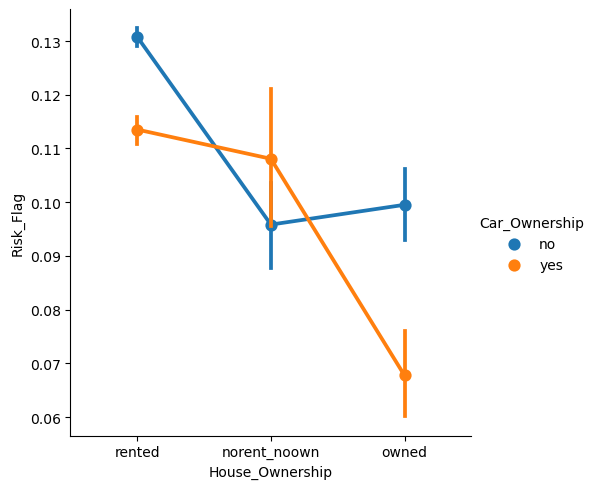

In [21]:
sns.catplot(x='House_Ownership',y='Risk_Flag',hue='Car_Ownership',data=data,kind='point')

In [22]:
data.STATE.nunique(),data.CITY.nunique()

(29, 317)

In [23]:
##There are 317 citys and they are a subset of state having count 29.

In [24]:
crosstab4=pd.crosstab(data.STATE,data.Risk_Flag,margins=True)
crosstab4.head()

Risk_Flag,0,1,All
STATE,,,
Andhra_Pradesh,22362,2935,25297
Assam,6132,930,7062
Bihar,17197,2583,19780
Chandigarh,595,61,656
Chhattisgarh,3323,511,3834


In [25]:
percent_defaulters_State=crosstab4[1]/crosstab4['All']*100
percent_defaulters_State.sort_values(ascending=False)

STATE
Manipur              21.554770
Tripura              16.810878
Kerala               16.709733
Jammu_and_Kashmir    15.898876
Madhya_Pradesh       15.436907
Odisha               14.255045
Rajasthan            14.083279
Jharkhand            13.329615
Chhattisgarh         13.328117
Himachal_Pradesh     13.325330
Assam                13.169074
Bihar                13.058645
Uttar_Pradesh[5]     13.055182
Telangana            13.011696
West_Bengal          12.813525
Haryana              12.420786
All                  12.300000
Gujarat              11.772440
Uttar_Pradesh        11.771127
Puducherry           11.653873
Andhra_Pradesh       11.602166
Maharashtra          11.325405
Mizoram              11.071849
Delhi                10.455373
Tamil_Nadu           10.316261
Karnataka            10.029523
Chandigarh            9.298780
Punjab                9.004237
Uttarakhand           7.097118
Sikkim                4.605263
dtype: float64

In [26]:
## This give us an idea that the percent of deafulters is most in manipur State

In [27]:
crosstab5=pd.crosstab(data.CITY,data.Risk_Flag,margins=True)
crosstab5.sort_values(by=1,ascending=False)

Risk_Flag,0,1,All
CITY,,,
All,221004,30996,252000
Kochi,718,243,961
Satna,796,232,1028
Buxar[37],757,228,985
Srinagar,920,216,1136
...,...,...,...
Latur,557,23,580
Katni,427,21,448
Bijapur,552,20,572


In [28]:
(crosstab5[1]/crosstab5['All']*100).sort_values(ascending=False).head()

CITY
Bhubaneswar    32.619440
Gwalior        27.272727
Bettiah[33]    26.695842
Kochi          25.286160
Raiganj        23.955432
dtype: float64

In [29]:
data.STATE[data.CITY=='Bhubaneswar'].value_counts()

STATE
Odisha    607
Name: count, dtype: int64

In [30]:
##Interesting thing is Bhubaneswar is city that have 32% of default rate, 
##while Odisha is state that Bhubaneswar is in but only have 14% of default rate.

In [31]:
##now we we find out the reate of defaulters state wise

<Axes: xlabel='STATE'>

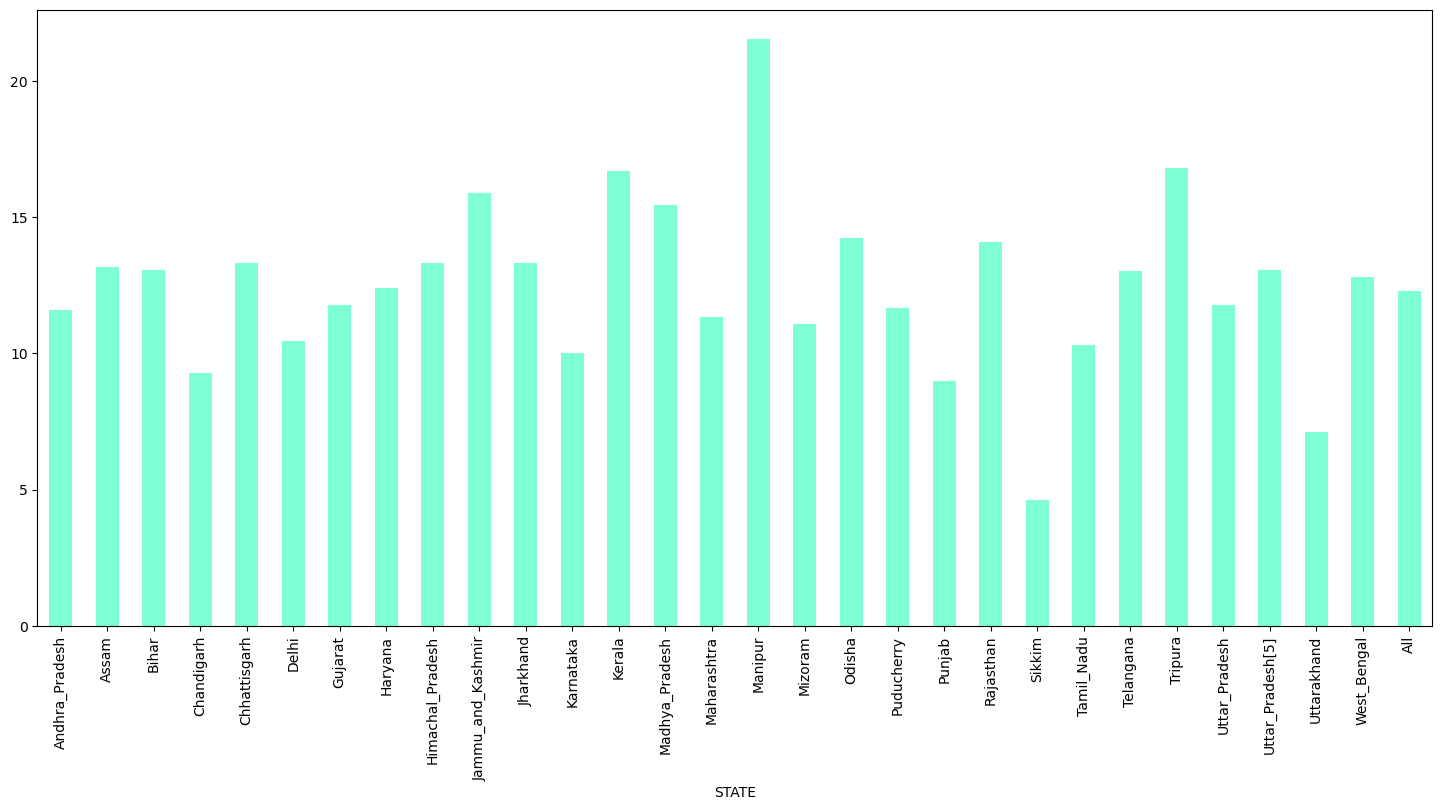

In [32]:
plt.figure(figsize=(18,8))
rate_defaulters_statewise=crosstab4[1]/crosstab4['All']*100
rate_defaulters_statewise.plot.bar(color='aquamarine')

In [33]:
##Overall Manipur is the state with Highest default rate(21%)
##2) Bhubaneshwar is city with default rate of 32% 

In [34]:
print('Highest Income is:',data.Income.max())
print('Lowest Income is:',data.Income.min())
print('Average Income is:',data.Income.mean())

Highest Income is: 9999938
Lowest Income is: 10310
Average Income is: 4997116.665325397


<Axes: >

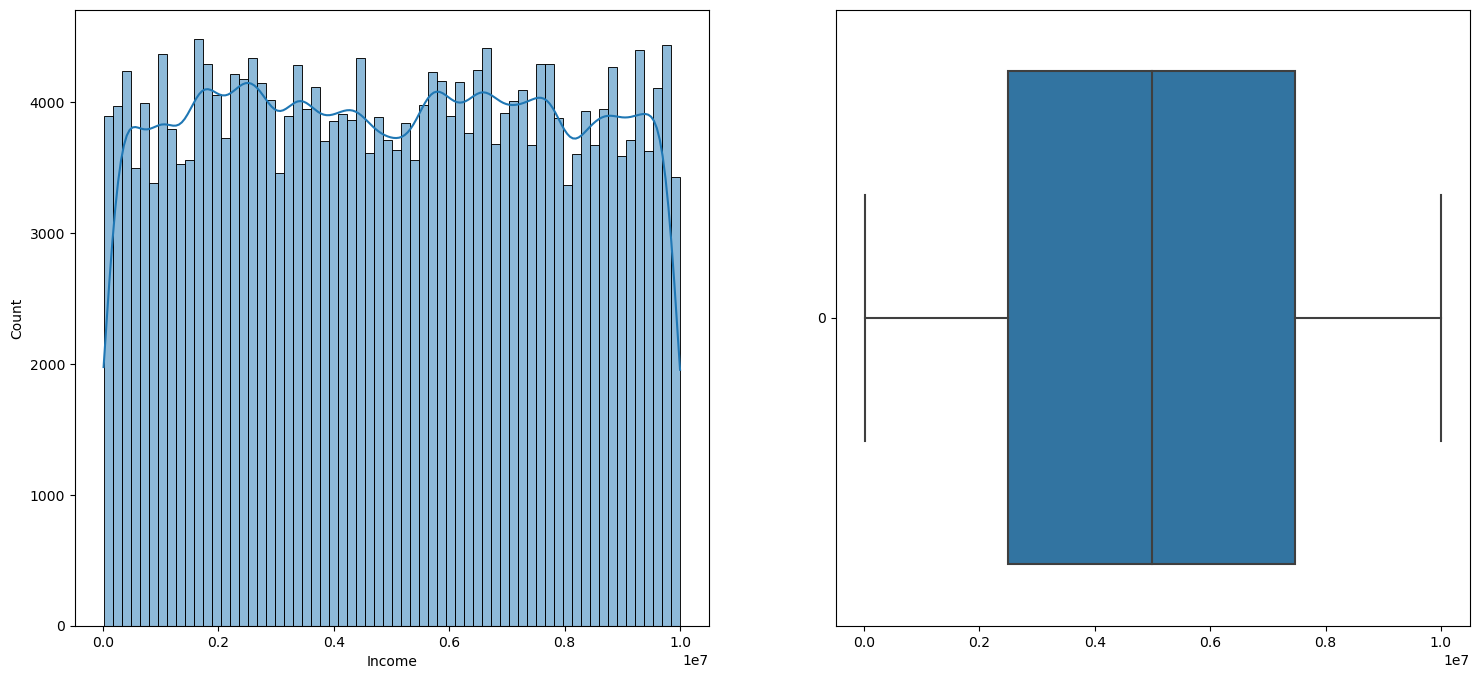

In [35]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.histplot(data.Income,ax=ax[0],kde=True)
sns.boxplot(data.Income,ax=ax[1],orient='h')
## the histogram and KDE provide a comprehensive view of the data distribution. 
## We can see the general shape and features of the distribution
## Here through the boxplot we can interpret that there is no outlier in income


In [36]:
print('Highest age is:',data.Age.max())
print('Lowest age is:',data.Age.min())
print('Average age is:',round(data.Age.mean()))

Highest age is: 79
Lowest age is: 21
Average age is: 50


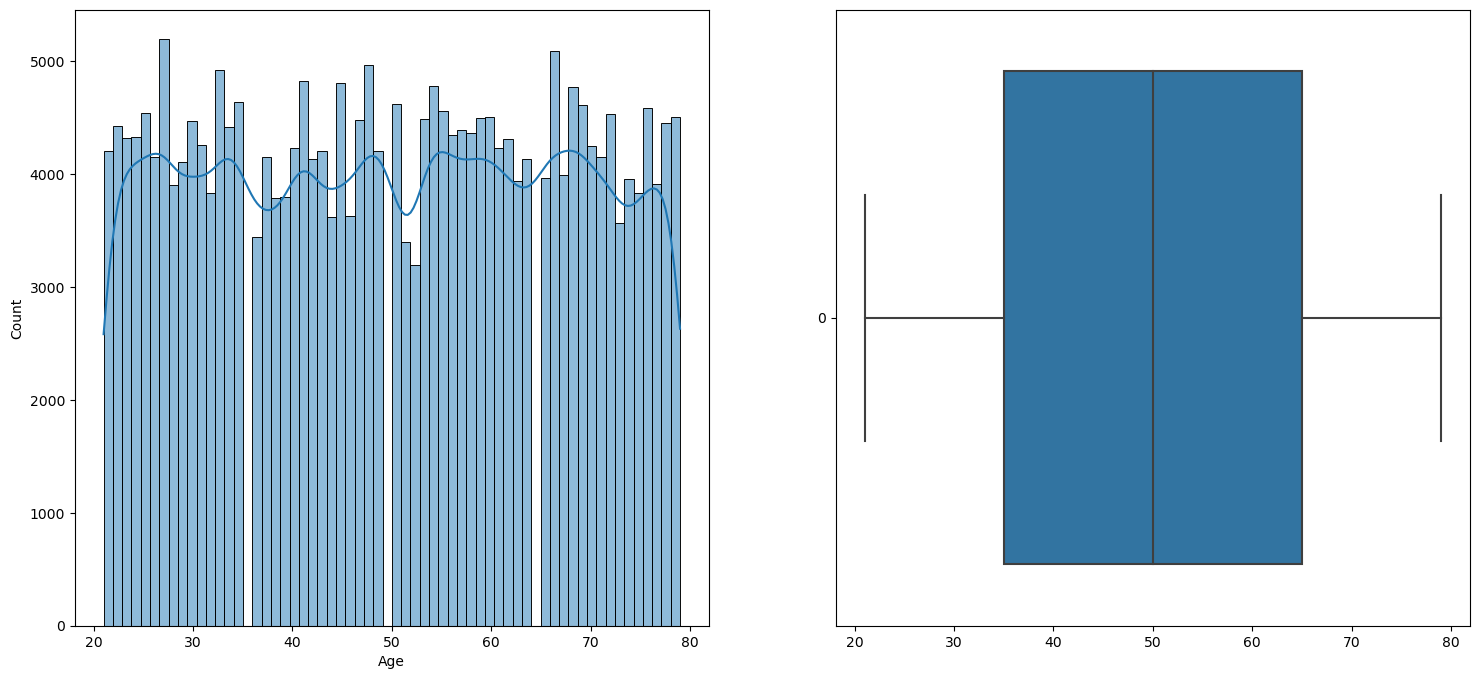

In [37]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.histplot(data.Age, ax=ax[0],kde=True);
sns.boxplot(data.Age, ax=ax[1],orient='h');

In [38]:
## From the boxplot we can interpret that the desnity

In [39]:
pd.crosstab(data.Experience,data.Risk_Flag,  margins=True)

Risk_Flag,0,1,All
Experience,,,
0,9461,1582,11043
1,9773,1802,11575
2,9197,1890,11087
3,10483,1586,12069
4,10358,1449,11807
5,10876,1565,12441
6,11601,1557,13158
7,9829,1403,11232
8,10016,1334,11350


C:\Users\hp\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


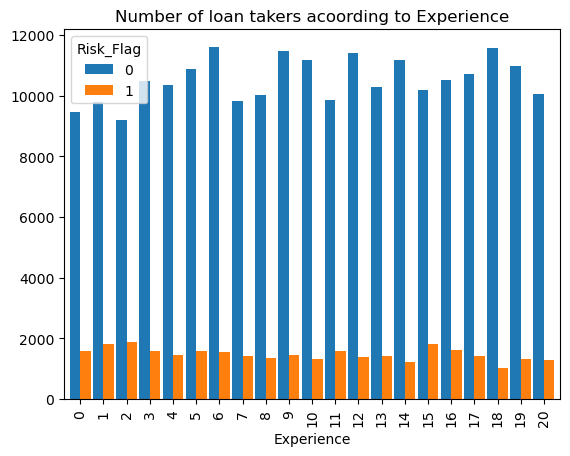

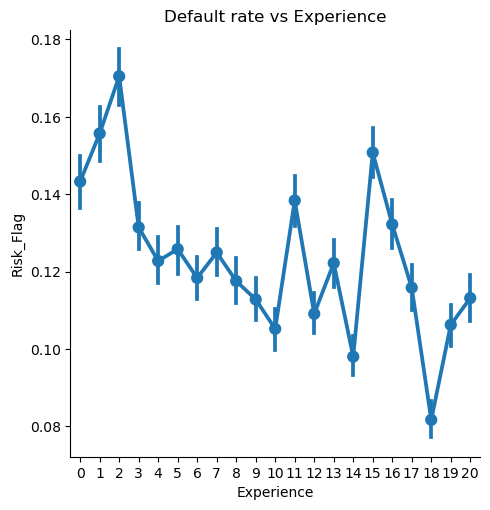

In [40]:

pd.crosstab(data.Experience, data.Risk_Flag).plot.bar(width=0.9).set(title="Number of loan takers acoording to Experience");
sns.catplot(x="Experience", y="Risk_Flag", data=data,kind='point').set(title="Default rate vs Experience")

In [41]:
pd.crosstab(data.CURRENT_JOB_YRS,data.Risk_Flag )

Risk_Flag,0,1
CURRENT_JOB_YRS,,
0,9461,1582
1,9773,1802
2,9197,1890
3,26049,3411
4,25132,3207
5,22119,2972
6,20621,2870
7,17580,2345
8,16693,2181


C:\Users\hp\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


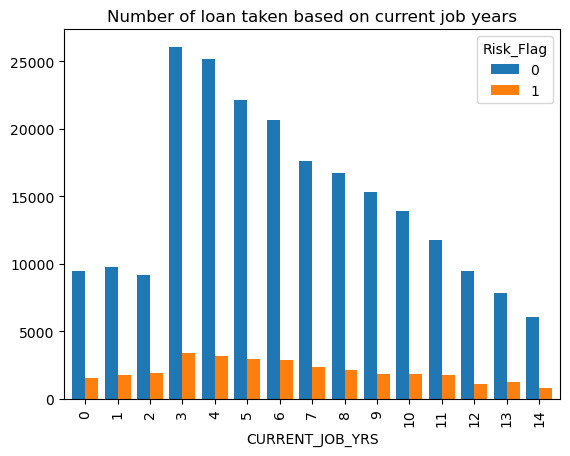

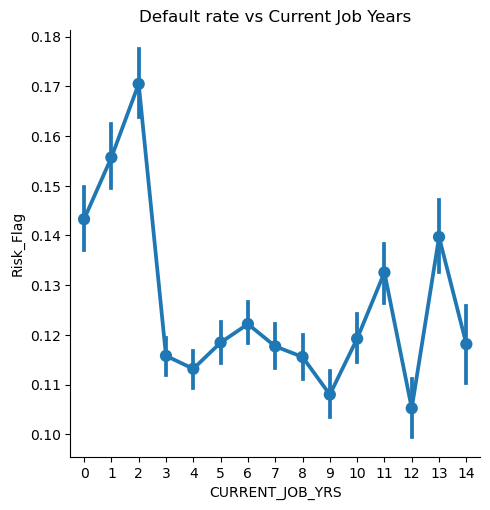

In [42]:
pd.crosstab(data.CURRENT_JOB_YRS ,data.Risk_Flag ).plot.bar(width=0.8).set(title="Number of loan taken based on current job years")
sns.catplot(x="CURRENT_JOB_YRS", y="Risk_Flag", data=data,kind='point').set(title="Default rate vs Current Job Years");

In [43]:
pd.crosstab(data.CURRENT_HOUSE_YRS,data.Risk_Flag,margins=True )


Risk_Flag,0,1,All
CURRENT_HOUSE_YRS,,,
10,42592,6082,48674
11,45390,6483,51873
12,45487,6304,51791
13,44477,6182,50659
14,43058,5945,49003
All,221004,30996,252000


C:\Users\hp\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


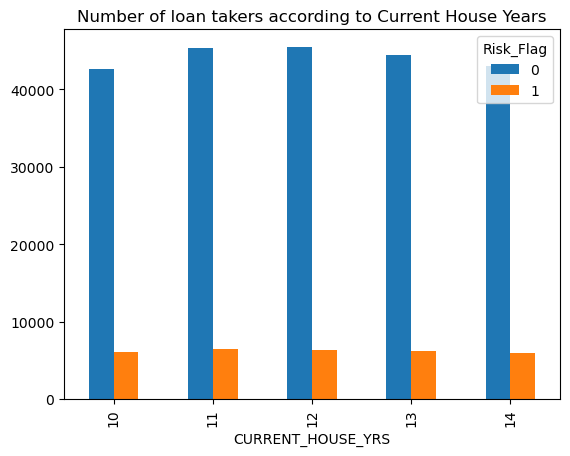

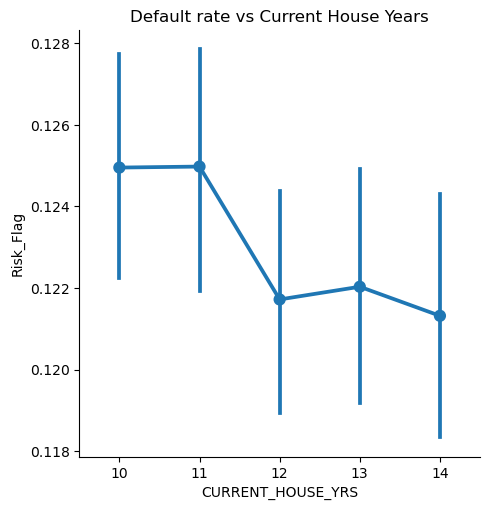

In [44]:
pd.crosstab(data.CURRENT_HOUSE_YRS ,data.Risk_Flag ).plot.bar().set(title="Number of loan takers according to Current House Years")
sns.catplot(x="CURRENT_HOUSE_YRS", y="Risk_Flag", data=data,kind='point').set(title="Default rate vs Current House Years");

In [45]:
print(data.dtypes)

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object


In [46]:
columns_to_plot=['Id','Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']
corr_mat=data[columns_to_plot].corr()
corr_mat

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


<Axes: >

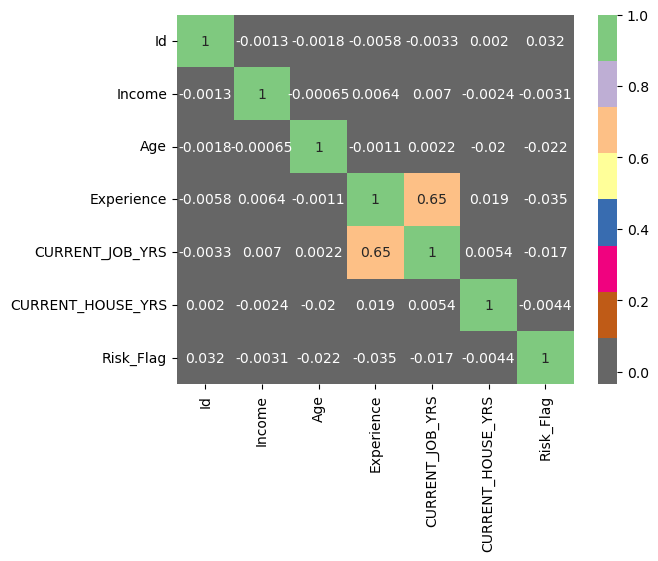

In [47]:
sns.heatmap(corr_mat,cmap='Accent_r',annot=True)

In [48]:
data["Age_band"] = 0
data.loc[(data["Age"] >= 21) & (data["Age"] <= 33), "Age_band"] = 0
data.loc[(data["Age"] > 33) & (data["Age"] <= 45), "Age_band"] = 1
data.loc[(data["Age"] > 45) & (data["Age"] <= 57), "Age_band"] = 2
data.loc[(data["Age"] > 57) & (data["Age"] <= 69), "Age_band"] = 3
data.loc[(data["Age"] > 69) & (data["Age"] <= 79), "Age_band"] = 4

In [49]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='Accent')

,count
Age_band,
0,56669
3,52435
2,51074
1,50075
4,41747


C:\Users\hp\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


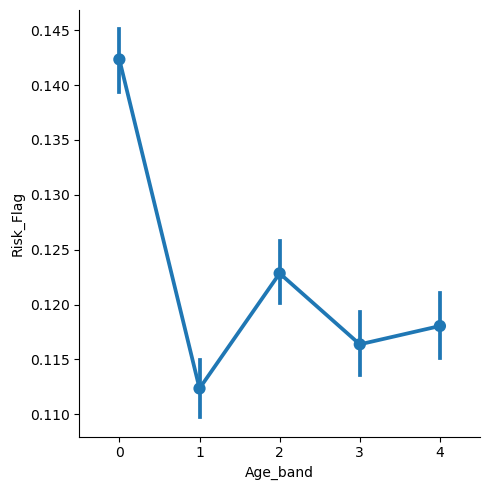

In [50]:
sns.catplot(x='Age_band',y='Risk_Flag',data=data,kind='point')

In [51]:
## From the catplot we can interpret that the age_band of 21-33 are the most risky group to give loan 
## As the age increasses the Risk of giving loans becomes less

In [52]:
## As the data is continuous we define income ranges using quantiles/

In [53]:
data['Income_range']=pd.qcut(data['Income'],4)
data.groupby(['Income_range'])['Risk_Flag'].mean().to_frame()

,Risk_Flag
Income_range,
"(10309.999, 2503015.0]",0.127919
"(2503015.0, 5000694.5]",0.119256
"(5000694.5, 7477502.0]",0.118485
"(7477502.0, 9999938.0]",0.126342


In [54]:
data['Income_cat'] = 0
data.loc[(data["Income"] >= 103010)&(data["Income"] <= 2503015), "Income_cat"]=0
data.loc[(data["Income"] > 2503015)&(data["Income"] <= 5000694.5), "Income_cat"]=1
data.loc[(data["Income"] > 5000694.5)&(data["Income"] <= 7477502), "Income_cat"]=2
data.loc[(data["Income"] > 7477502)&(data["Income"] <= 9999938), "Income_cat"]=3

C:\Users\hp\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


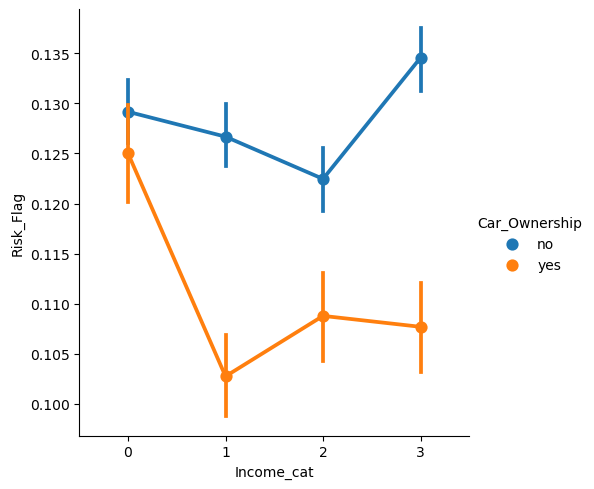

In [55]:
sns.catplot(x="Income_cat",y= "Risk_Flag", data=data, hue="Car_Ownership",kind='point')

In [56]:
## People in income_category 0 default the most ,may they be owner of the car or not and one more observation shows that people
##people with no car in the high income category default the most

In [57]:
##There is multicolinearity between Current job years & Experience so one of them can be removed and the people with 
## current job years seems important factor for the loan analysis than experience

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

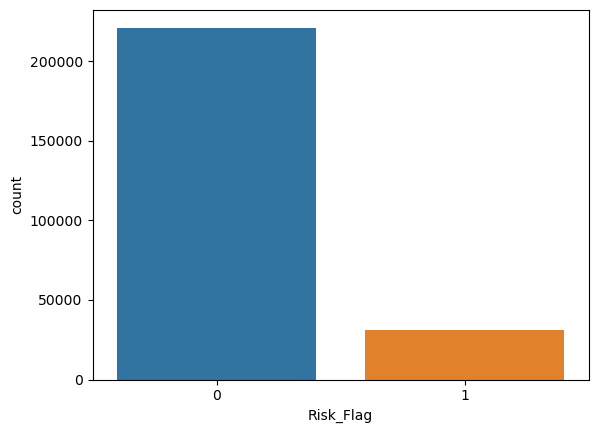

In [58]:
sns.countplot(x="Risk_Flag",data=data)
data.Risk_Flag.value_counts()

In [59]:
train_data=data

In [60]:
train_data.drop([ "Income", "Income_range", "Age", "Experience"], axis=1, inplace=True)

In [61]:
## As we have categorical data we first transform it into numerical one

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:

columns=['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
le=LabelEncoder()

for x in columns:
    train_data[x]=le.fit_transform(train_data[x])

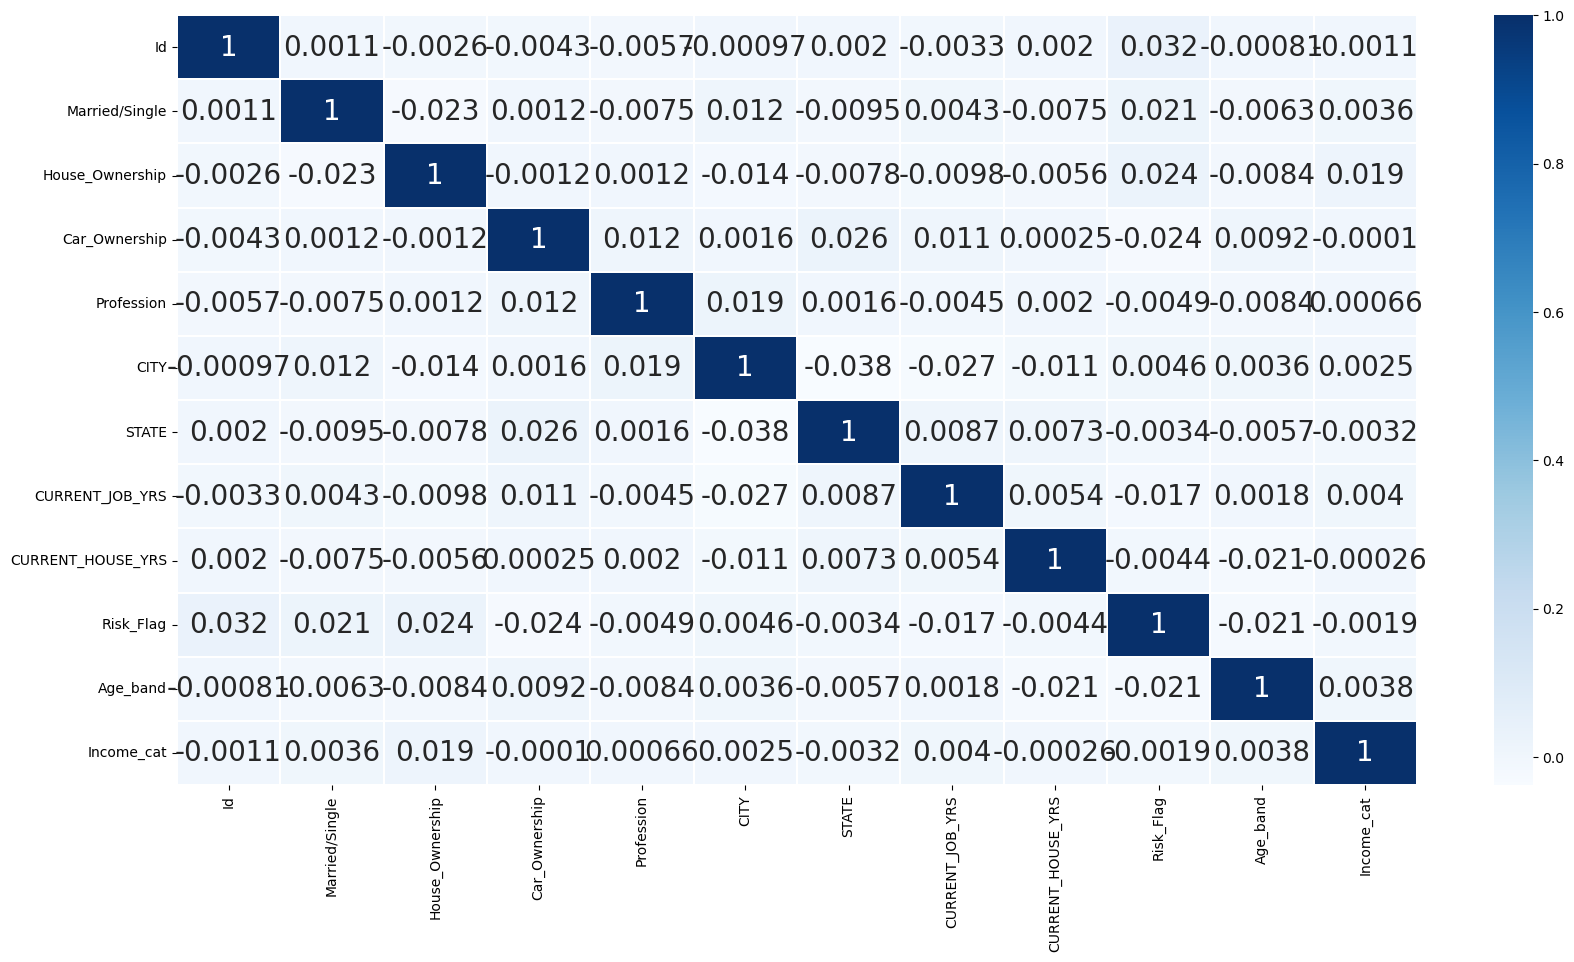

In [64]:
sns.heatmap(train_data.corr(), annot=True, linewidth=0.2, annot_kws={"size":20}, cmap="Blues")
fig = plt.gcf()
fig.set_size_inches(20,10)

In [65]:
## It is correlation between th categorical variables which we transformed to numerical values


## Predictive Model

In [66]:
train_data.head()

,Id,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_band,Income_cat
0,1,1,2,0,33,251,13,3,13,0,0,0
1,2,1,2,0,43,227,14,9,13,0,1,3
2,3,0,2,0,47,8,12,4,10,0,3,1
3,4,1,2,1,43,54,17,2,12,1,1,2
4,5,1,2,0,11,296,22,3,14,1,2,2


In [67]:
from sklearn.model_selection import train_test_split
x = train_data.drop('Risk_Flag', axis=1)
y = train_data['Risk_Flag']

In [68]:
y = train_data['Risk_Flag']

In [69]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42, stratify=train_data.Risk_Flag)

In [70]:
import warnings
warnings.filterwarnings("ignore")

##  LogisticRegression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

model1=LogisticRegression()
model1.fit(x,y)
predict1=model1.predict(test_x)


In [72]:
predicted_riskflag=pd.DataFrame(predict1)
predicted_riskflag.value_counts()

0    75600
Name: count, dtype: int64

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
metrics.accuracy_score(predicted_riskflag, test_y)

0.8769973544973545

In [75]:
print(classification_report(test_y, predict1))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



Text(0.5, 1.0, 'Confusion Matrix')

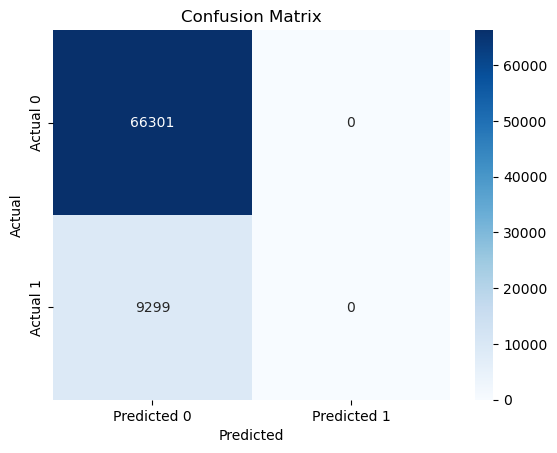

In [76]:
confusion_mat=confusion_matrix(test_y,predict1)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

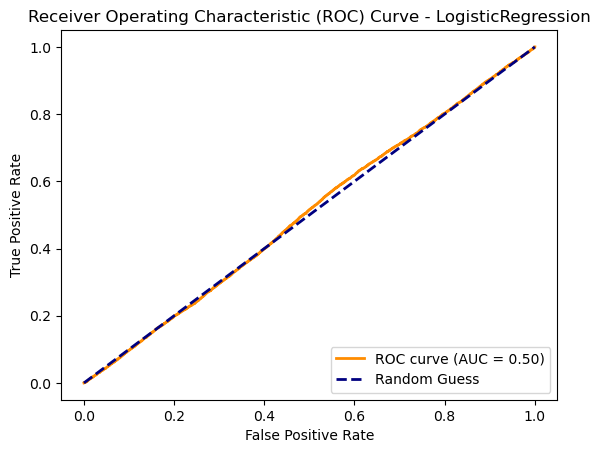

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_probs_rf = model1.predict_proba(test_x)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LogisticRegression')
plt.legend(loc='lower right')

## KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

model2= KNeighborsClassifier()
model2.fit(train_x, train_y)
predict2= model2.predict(test_x)


In [79]:
a=pd.DataFrame(predict2)
pd.DataFrame(predict2).value_counts()


0    73658
1     1942
Name: count, dtype: int64

In [80]:
print(classification_report(test_y, predict2))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66301
           1       0.20      0.04      0.07      9299

    accuracy                           0.86     75600
   macro avg       0.54      0.51      0.50     75600
weighted avg       0.80      0.86      0.82     75600



Text(0.5, 1.0, 'Confusion Matrix')

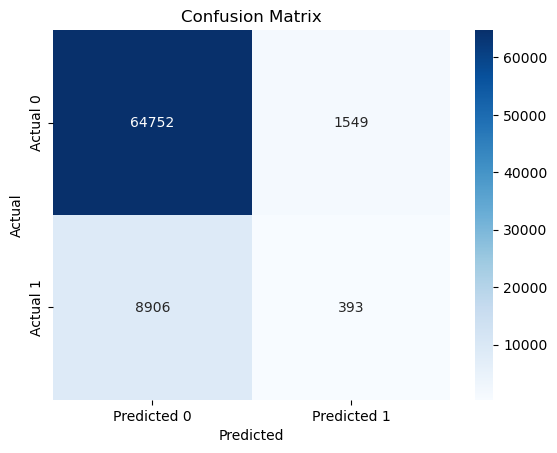

In [81]:
confusion_mat=confusion_matrix(test_y,predict2)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

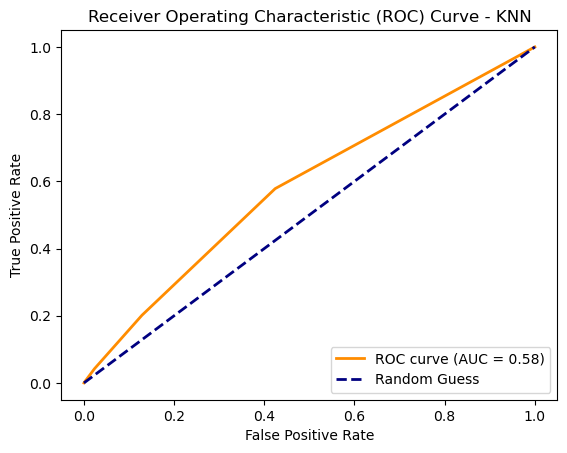

In [82]:
y_probs_rf = model2.predict_proba(test_x)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')

In [83]:
62457/75600*100,4738/75600*100

(82.61507936507937, 6.267195767195767)

## RandomForestClassifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

model3= RandomForestClassifier(random_state=1, n_estimators = 50)
model3.fit(train_x, train_y)
predict3 = model3.predict(test_x)
predict3


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
predict3=pd.DataFrame(predict3)
predict3.value_counts()


0    69804
1     5796
Name: count, dtype: int64

In [86]:
print(classification_report(test_y, predict3))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     66301
           1       0.68      0.42      0.52      9299

    accuracy                           0.90     75600
   macro avg       0.80      0.70      0.73     75600
weighted avg       0.89      0.90      0.89     75600



Text(0.5, 1.0, 'Confusion Matrix')

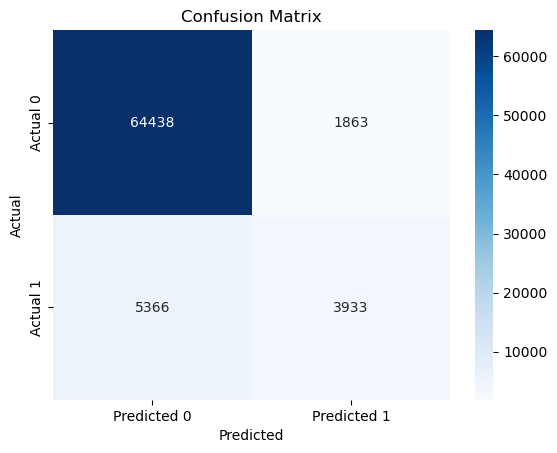

In [87]:

confusion_mat=confusion_matrix(test_y,predict3)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


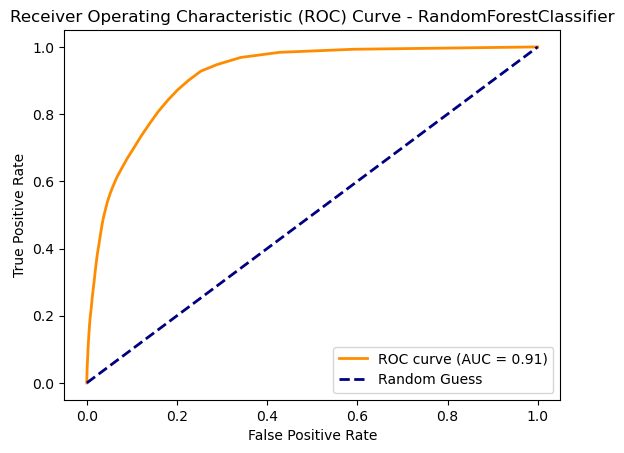

In [88]:
y_probs_rf = model3.predict_proba(test_x)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - RandomForestClassifier')
plt.legend(loc='lower right')

In [89]:
64438/75600*100,3933/75600*100

(85.23544973544973, 5.202380952380952)

## Decision tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

model4= DecisionTreeClassifier(random_state=420)
model4.fit(train_x, train_y)
predict4 = model4.predict(test_x)


In [91]:
pd.DataFrame(predict4).value_counts()

0    65576
1    10024
Name: count, dtype: int64

In [92]:
print(classification_report(test_y, predict4))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     66301
           1       0.41      0.44      0.43      9299

    accuracy                           0.85     75600
   macro avg       0.67      0.68      0.67     75600
weighted avg       0.86      0.85      0.86     75600



Text(0.5, 1.0, 'Confusion Matrix')

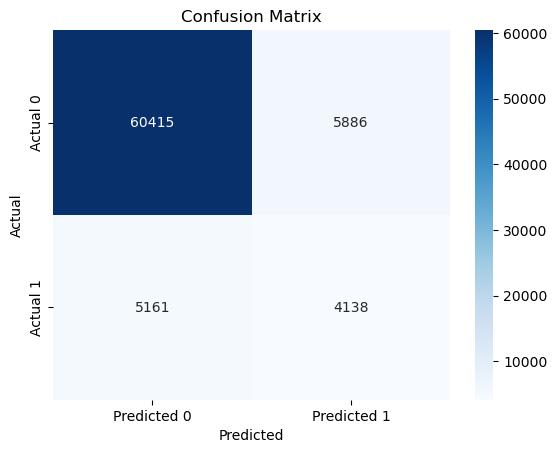

In [93]:
confusion_mat=confusion_matrix(test_y,predict4)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


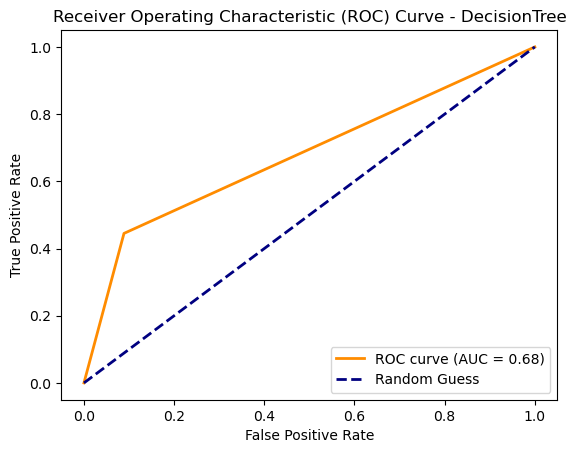

In [94]:
y_probs_rf = model4.predict_proba(test_x)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - DecisionTree')
plt.legend(loc='lower right')

## Xg Boost Classifier

In [1]:
from xgboost import XGBClassifier

model5= XGBClassifier()
model5.fit(train_x, train_y)
predict5 = model5.predict(test_x)
predict5

ModuleNotFoundError: No module named 'xgboost'

In [96]:
pd.DataFrame(predict5).value_counts()

0    72461
1     3139
Name: count, dtype: int64

In [97]:
print(classification_report(test_y, predict5))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     66301
           1       0.90      0.30      0.45      9299

    accuracy                           0.91     75600
   macro avg       0.90      0.65      0.70     75600
weighted avg       0.91      0.91      0.89     75600



Text(0.5, 1.0, 'Confusion Matrix')

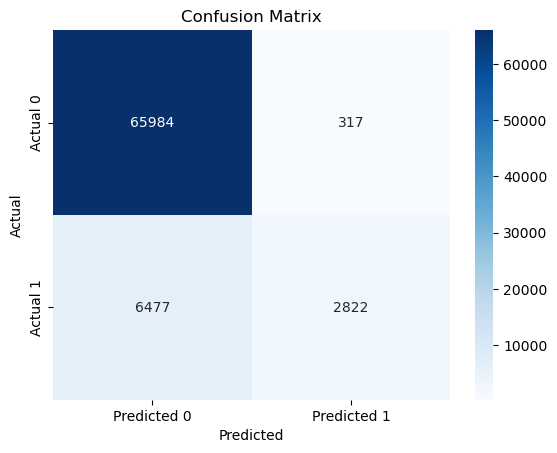

In [98]:
confusion_mat=confusion_matrix(test_y,predict5)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

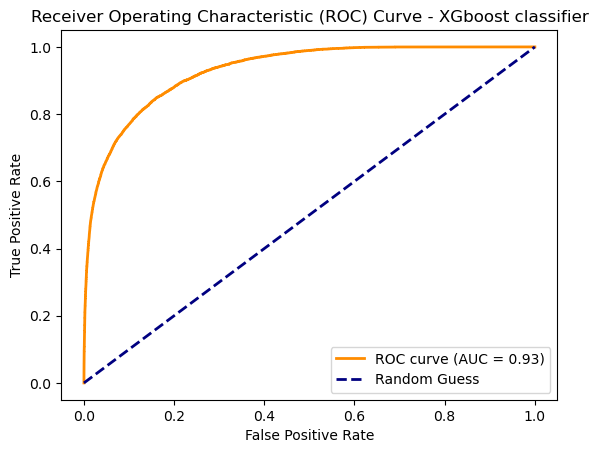

In [99]:
y_probs_rf = model5.predict_proba(test_x)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGboost classifier')
plt.legend(loc='lower right')

In [100]:
test_data=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Test Data.csv")
test_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [101]:
test_data["Age_band"] = 0
test_data.loc[(test_data["Age"] >= 21) & (test_data["Age"] <= 33), "Age_band"] = 0
test_data.loc[(test_data["Age"] > 33) & (test_data["Age"] <= 45), "Age_band"] = 1
test_data.loc[(test_data["Age"] > 45) & (test_data["Age"] <= 57), "Age_band"] = 2
test_data.loc[(test_data["Age"] > 57) & (test_data["Age"] <= 69), "Age_band"] = 3
test_data.loc[(test_data["Age"] > 69) & (test_data["Age"] <= 79), "Age_band"] = 4

In [102]:
test_data['Income_cat'] = 0
test_data.loc[(test_data["Income"] >= 103010)&(test_data["Income"] <= 2503015), "Income_cat"]=0
test_data.loc[(test_data["Income"] > 2503015)&(test_data["Income"] <= 5000694.5), "Income_cat"]=1
test_data.loc[(test_data["Income"] > 5000694.5)&(test_data["Income"] <= 7477502), "Income_cat"]=2
test_data.loc[(test_data["Income"] > 7477502)&(test_data["Income"] <= 9999938), "Income_cat"]=3

In [103]:
test_data.drop(["Income", "Age", "Experience"], axis=1, inplace=True)

In [104]:
columns=['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
le=LabelEncoder()

for y in columns:
    test_data[y]=le.fit_transform(test_data[y])

## Predicting the Risk Flag column on test data 

In [105]:
y_pred_prob = model3.predict_proba(test_data)
y_pred_prob_data = pd.DataFrame(data=y_pred_prob, columns=['p', 'q'])

In [106]:
Response_prediction = test_data[['Id']]
y_pred_prob_data['Id'] = Response_prediction['Id']
y_pred_prob_data.head()

,p,q,Id
0,0.90,0.10,1
1,1.00,0.00,2
2,0.82,0.18,3
3,0.80,0.20,4
4,0.88,0.12,5
